# Working with Python and REST APIs

## Setup

Before we can start, we need to switch our Jupyter Kernel to our Virtual Environment.

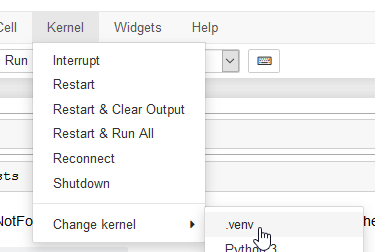

We are using the popular [Requests](https://pypi.org/project/requests/) package for our API requests. So we need to import it, preferrably at the beginnnig of our file.

In [1]:
import requests

If you get a "ModuleNotFoundError" Exception at this point you need to install the Python requirements for this Notebook first.

```pip install -r requirements.txt```

> Note: Remember to do this in our virtual environment.

## Let's get started - Deck of Cards API

Every REST API is running on an URL so we create a variable for this.

In [2]:
api_host= "https://deckofcardsapi.com"
api_resource = "/api/deck/new/shuffle/"

url_getdeck = api_host + api_resource

The Deck of Cards API supports a parameter called 'deck_count' that we can use to request a certain number of decks.

In [3]:
querystring = {"deck_count": "6"}

Our HTML header information.

In [4]:
headers = {
   'Cache-Control': "no-cache",
   'Postman-Token': "dd1d8ca5-7000-21b2-2230-39969d585419"
   }

Send the request and catch the result in a new variable 'response'.

In [5]:
response = requests.request("GET", url_getdeck, headers=headers, params=querystring)

Our response variable is not just some kind of string or single value. It is a Response object from "Requests". You can find more information about it's content on this [W3Schools](https://www.w3schools.com/python/ref_requests_response.asp) page.

Take a look at the main content of the response.

In [6]:
print(response.text)

{"success": true, "deck_id": "1wbaamz5nvwn", "remaining": 312, "shuffled": true}


As you can see, the API gave us some JSON looking data back. This is quite typical for an API, another option is XML. But for Python this is currently not JSON but a simple string.

In [7]:
type(response.text)

str

Using this datatype would be a painful if we want to access specific data like the deck_id. A way better datatype for doing this would be a dictionary. Lucky us, the Response object already has a method for this. .json() returns a dictionary parsed from the response.text value. 

In [8]:
deck = response.json()

In [9]:
print(deck)

{'success': True, 'deck_id': '1wbaamz5nvwn', 'remaining': 312, 'shuffled': True}


Prettier version:

In [10]:
display(deck)

{'success': True,
 'deck_id': '1wbaamz5nvwn',
 'remaining': 312,
 'shuffled': True}

Not a Python but iPython method used in Jupyter. For your standalone scripts better do:
```
from pprint import pprint
pprint(deck)
```

Cool. Now that we have a dict we can play with it.

In [11]:
print(type(deck))


<class 'dict'>


In [12]:
deck_id = deck['deck_id']
print(deck_id)

1wbaamz5nvwn


Pokertime!

In [13]:
api_resource = f"/api/deck/{deck_id}/draw/"

url_5cards = api_host + api_resource
querystring = {"count": "5"}

response = requests.request("GET", url_5cards, headers=headers, params=querystring)

cards = response.json()
display(cards)

# Import IPythons magic Image rendering
from IPython.display import Image
from IPython.core.display import HTML 

for card in cards["cards"]:
    print(card["code"])
    url_image = card["image"]
    display(Image(url= url_image))

{'success': True,
 'deck_id': '1wbaamz5nvwn',
 'cards': [{'code': 'KS',
   'image': 'https://deckofcardsapi.com/static/img/KS.png',
   'images': {'svg': 'https://deckofcardsapi.com/static/img/KS.svg',
    'png': 'https://deckofcardsapi.com/static/img/KS.png'},
   'value': 'KING',
   'suit': 'SPADES'},
  {'code': 'KH',
   'image': 'https://deckofcardsapi.com/static/img/KH.png',
   'images': {'svg': 'https://deckofcardsapi.com/static/img/KH.svg',
    'png': 'https://deckofcardsapi.com/static/img/KH.png'},
   'value': 'KING',
   'suit': 'HEARTS'},
  {'code': '5D',
   'image': 'https://deckofcardsapi.com/static/img/5D.png',
   'images': {'svg': 'https://deckofcardsapi.com/static/img/5D.svg',
    'png': 'https://deckofcardsapi.com/static/img/5D.png'},
   'value': '5',
   'suit': 'DIAMONDS'},
  {'code': '5H',
   'image': 'https://deckofcardsapi.com/static/img/5H.png',
   'images': {'svg': 'https://deckofcardsapi.com/static/img/5H.svg',
    'png': 'https://deckofcardsapi.com/static/img/5H.png

KS


KH


5D


5H


8S


## OpenStreetMap

In [14]:
overpass_url = "https://lz4.overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="Heilbronn"];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
if response.status_code == 200:
    data = response.json()
    display(data)
else:
    print(f"Request failed with reason '{response.reason}'")

{'version': 0.6,
 'generator': 'Overpass API 0.7.61.5 4133829e',
 'osm3s': {'timestamp_osm_base': '2024-03-13T11:58:45Z',
  'timestamp_areas_base': '2024-03-13T10:47:15Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 281872588,
   'lat': 49.2245319,
   'lon': 9.2124805,
   'tags': {'amenity': 'biergarten', 'name': 'Reiterstüble'}},
  {'type': 'node',
   'id': 364749746,
   'lat': 49.1746744,
   'lon': 8.8301669,
   'tags': {'amenity': 'biergarten',
    'name': 'Seekiosk',
    'wheelchair': 'limited'}},
  {'type': 'node',
   'id': 1417204588,
   'lat': 49.1884572,
   'lon': 9.2410025,
   'tags': {'amenity': 'biergarten',
    'name': 'Strandkorb',
    'opening_hours': 'Mo-Th 15:00-24:00, Fr,Sa 15:00-01:00, PH,Su 12:00-24:00',
    'toilets:wheelchair': 'no',
    'wheelchair': 'yes'}},
  {'type': 'node',
   'id': 1864466751,
   'lat': 49.2401287,
   'lon': 9.1087041,
   't